# Classification metrics

In order to learn about popular methods of classifier evaluation, we will generate example sequences of example classes. For this purpose, we will use the numpy library and a random number generator from the normal distribution.

In [1]:
import numpy as np
import pandas as pd
from numpy.random import RandomState
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from matplotlib import pyplot as plt

Let's generate an example for us to better understand classification metrics 

In [34]:
random = RandomState(30)

random_1 = random.normal(loc=0.0, size=100)
random_2 = random.normal(loc=1, size=100)
random_3 = random.logistic(size=100)
y_test = [1 if i >= 0 else 0 for i in random_1]
y_pred = [1 if i >= 0 else 0 for i in random_3]
print(y_test[:10])
print(y_pred[:10])


[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 1]


Just to illustrate the meaning of the numbers we have generated

In [35]:
example = pd.DataFrame({'Real Class': y_test, 'Class Predicted by some classification model': y_pred, 'sum': np.array(y_test)+np.array(y_pred)})
example['Correct prediction?'] = ['False' if s == 1 else 'True' for s in example['sum']]
example = example.drop(['sum'], axis = 1)

example

,Real Class,Class Predicted by some classification model,Correct prediction?
0,0,1,False
1,1,1,True
2,0,1,False
3,1,0,False
4,0,0,True
...,...,...,...
95,0,1,False
96,1,1,True
97,0,1,False
98,1,0,False


# Confusion Matrix

In [61]:
# True Positives  # False Positives
# False Negatives # True Negatives

def confusion_matrix_selfmade(y_test, y_pred):
    tp, fp, tn, fn = 0, 0, 0, 0
    for real, predicted in zip(y_test, y_pred):
        if real == predicted:
            if predicted: # if predicted == 1: 
                tp += 1
            else:
                tn += 1
        else:
            if predicted:
                fp += 1
            else:
                fn += 1

    return {'TP': tp,'TN': tn, 'FP': fp,'FN': fn}

        

In [37]:
confusion_matrix(y_test, y_pred)

{'TP': 28, 'TN': 32, 'FP': 25, 'FN': 15}

# Accuracy

In [62]:
# Accuracy = (TP+TN)/(TP+TN+FP+FN)

def accuracy(y_test, y_pred): 
    dct=confusion_matrix_selfmade(y_test, y_pred)
    accuracy = (dct['TP']+dct['TN'])/(dct['TP']+dct['TN']+dct['FP']+dct['FN'])
    return accuracy
    

In [39]:
accuracy(y_test, y_pred)

0.6

In [ ]:
# Accuracy is not a good measure for imbalanced datasets (e.g. predicting rare events)

# Predict earthquake 
# No earthquake 999 - Label 0,
# Earthquake 1 - Label 1

# This "model" with always say that no earthquake is going to happen
def model(): 
    return 0

# accuracy = correct predictions / all observations

# accuracy = 999/1000 = 0.999

# In general: Accuracy is a number from 0 to 1, where the perfect model has accuracy 1

# Recall, Precision, F1 Scores

In [63]:
def recall(y_test, y_pred): 
    dct=confusion_matrix_selfmade(y_test, y_pred)
    recall = (dct['TP'])/(dct['TP']+dct['FN'])
    return recall


def precision(y_test, y_pred): 
    dct=confusion_matrix_selfmade(y_test, y_pred)
    precision = (dct['TP'])/(dct['TP']+dct['FP'])
    return precision

In [64]:
recall(y_test, y_pred)

0.6511627906976745

In [65]:
precision(y_test, y_pred)

0.5283018867924528

In [66]:
def f1(y_test, y_pred): 
    r = recall(y_test, y_pred)
    p = precision(y_test, y_pred)
    
    return (2*r*p)/(r+p)

In [67]:
f1(y_test, y_pred)

0.5833333333333333

In [ ]:
# 5 earthquakes
# 995 not earthquakes

# 3 correctly predicted an earthquake
# 10 times we have predicted that there going to be an earthquake

# precision = 3/10 = 0.3
# recall = 3/5 = 0.6
# f1 = 2*0.3*0.6 / 0.6+0.3 = 0.36/0.9 = 0.4


# accuracy = 993 / 1000 = 0.993

In [47]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [49]:
confusion_matrix(y_test, y_pred)

array([[32, 25],
       [15, 28]], dtype=int64)

In [68]:
assert recall_score(y_test, y_pred) == recall(y_test, y_pred)

In [69]:
assert precision_score(y_test, y_pred) == precision(y_test, y_pred)

In [70]:
assert f1_score(y_test, y_pred) == f1(y_test, y_pred)

# ROC AUC CURVE

In [75]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [78]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [76]:
roc_auc_score(y_test, y_pred)

0.6062831497348021

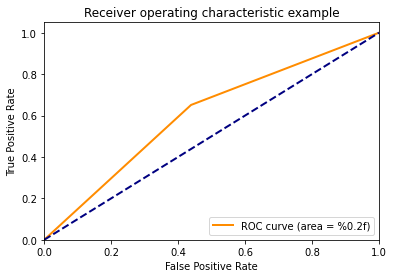

In [82]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)",
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()